In [ ]:
#TASK 2:
#Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle.
#Explore the relationships between variables and identify patterns and trends in the data.

In [5]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('train.csv')
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool>

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
# Drop 'Cabin' because too many missing values
# Add a check to see if 'Cabin' column exists before dropping
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)
else:
    print("'Cabin' column not found in DataFrame.")

# Fill 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify again
df.isnull().sum()

'Cabin' column not found in DataFrame.


<ipython-input-17-6a9f2428f55c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#UNIVARIATE ANALYSIS(SINGLE VARIABLE)

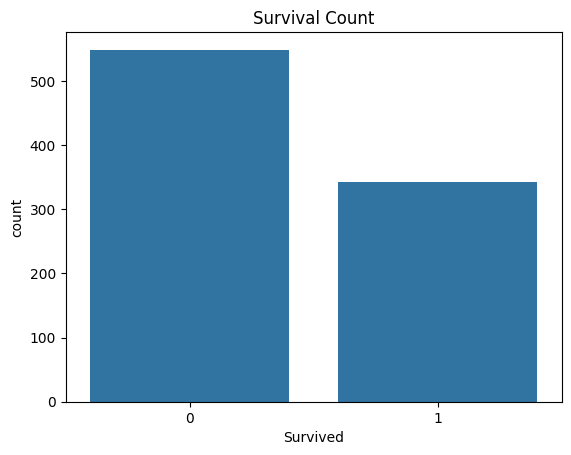

In [18]:
#1.SURVIVAL COUNT
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

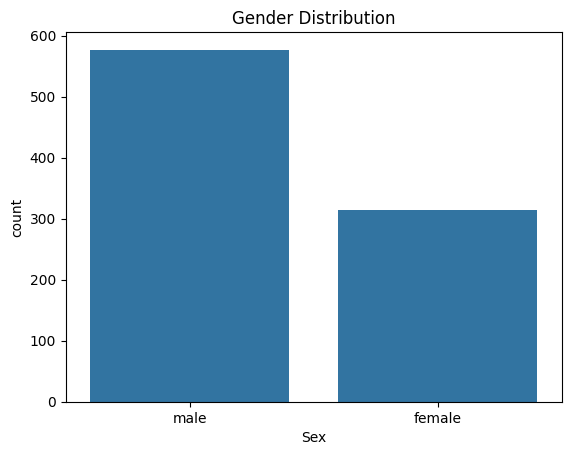

In [19]:
#2.GENDER DISTRIBUTION
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

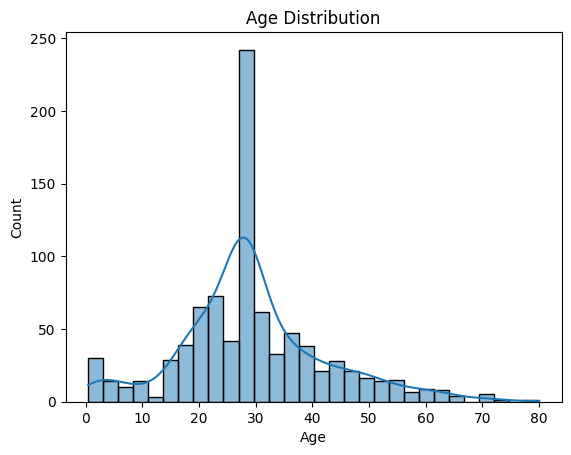

In [20]:
#3.AGE DISTRIBUTION
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
#BIVARIATE ANALYSIS(TWO VARIABLES)

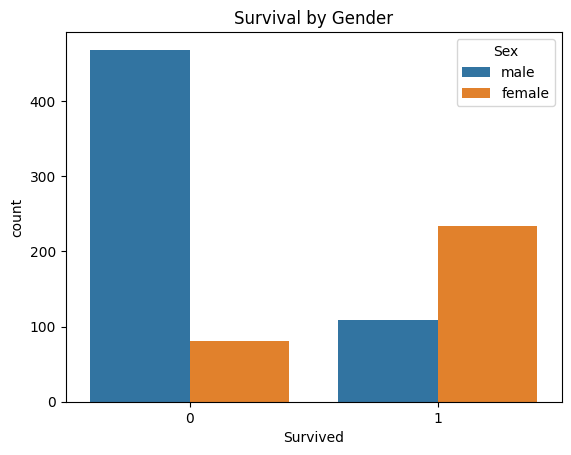

In [21]:
#1.SURVIVAL BY GENDER
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

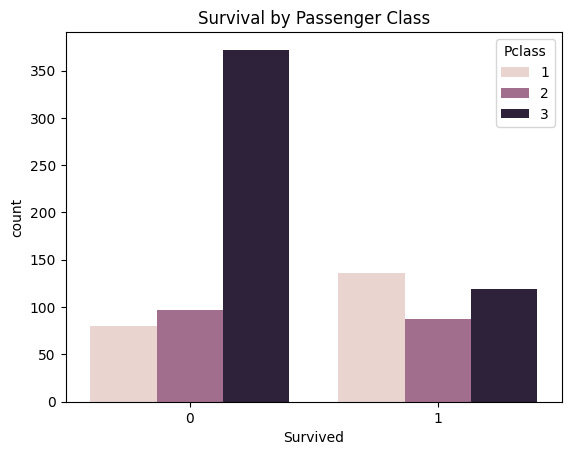

In [22]:
#2.SURVIVAL BY CLASS
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()


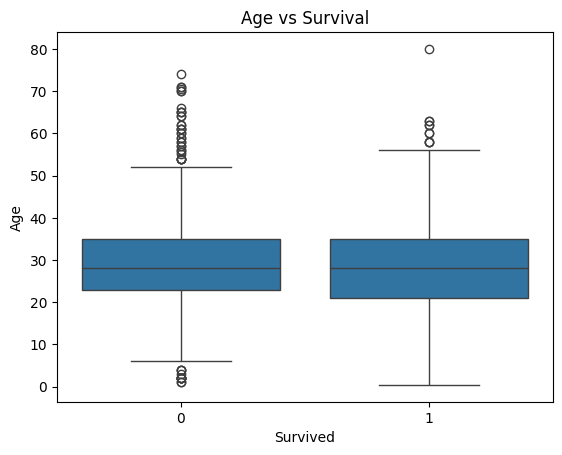

In [23]:
#3.AGE VS SURVIVAL
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()



In [ ]:
#MULTIVARIATE ANALYSIS

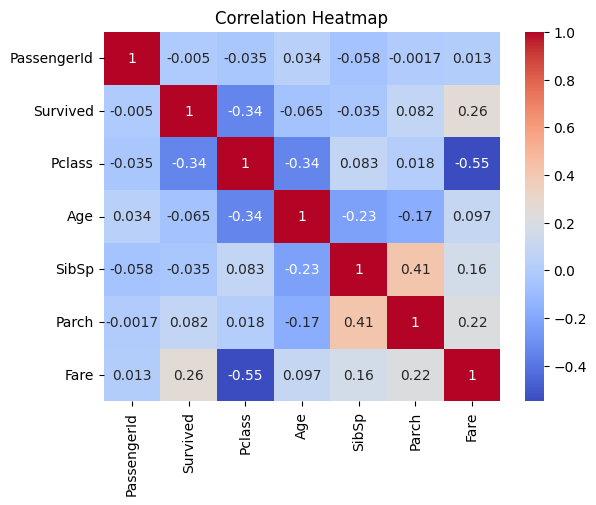

In [26]:
#1.HEATMAP FOR CORRELATION
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

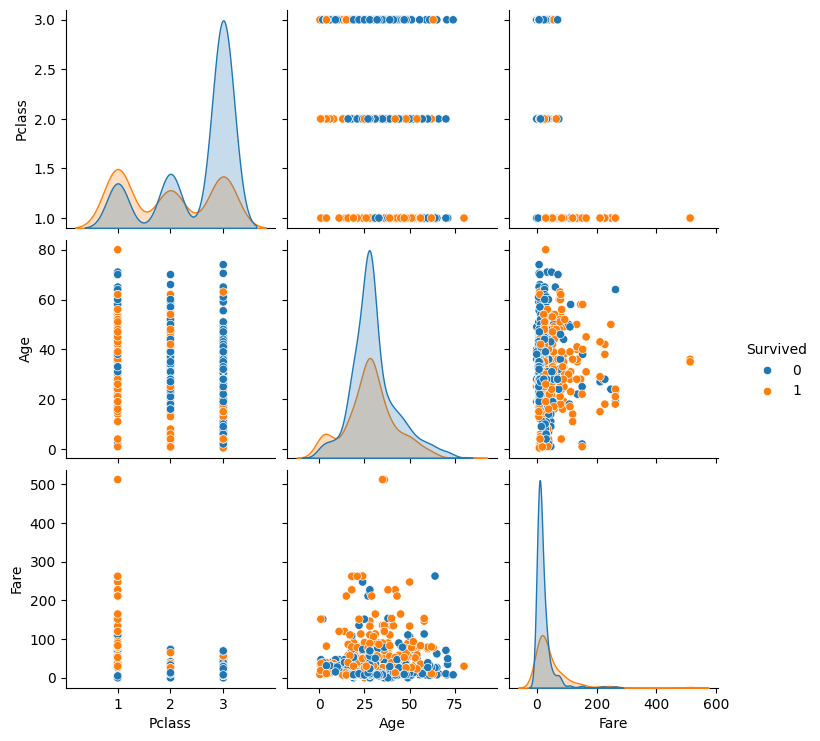

In [25]:
#2.PAIRPLOT FOR SELECTED FEATURES
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()


In [ ]:
#Explore the relationships between variables and identify patterns and trends in the data.

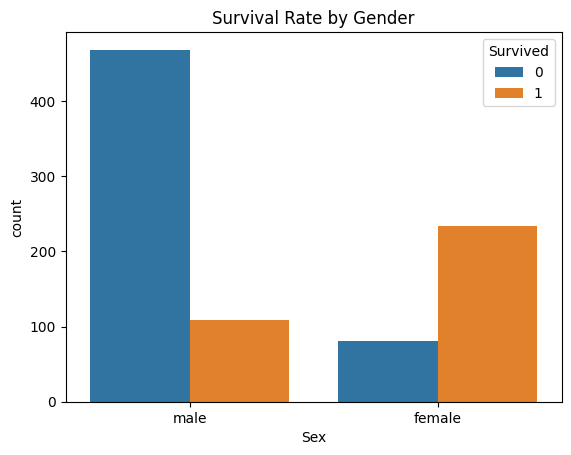

In [27]:
#1.SURVIVAL VS SEX
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


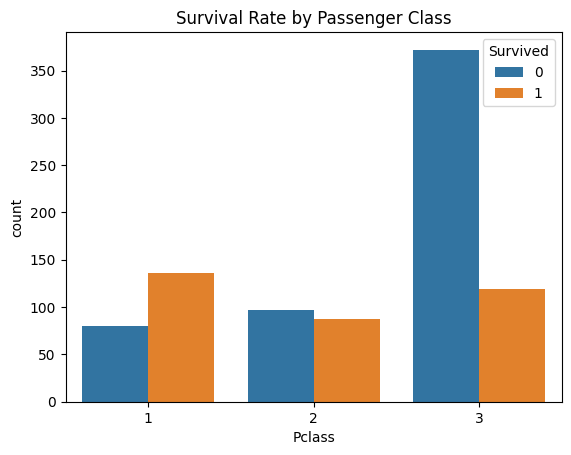

In [29]:
#2.SURVIVAL VS PASSENGER CLASS(Pclass)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


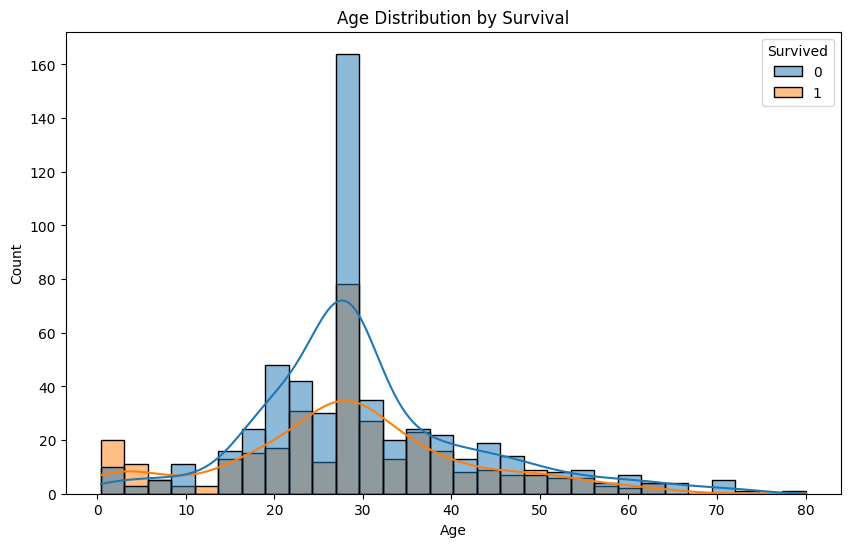

In [30]:
#3.SURVIVAL VS AGE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()


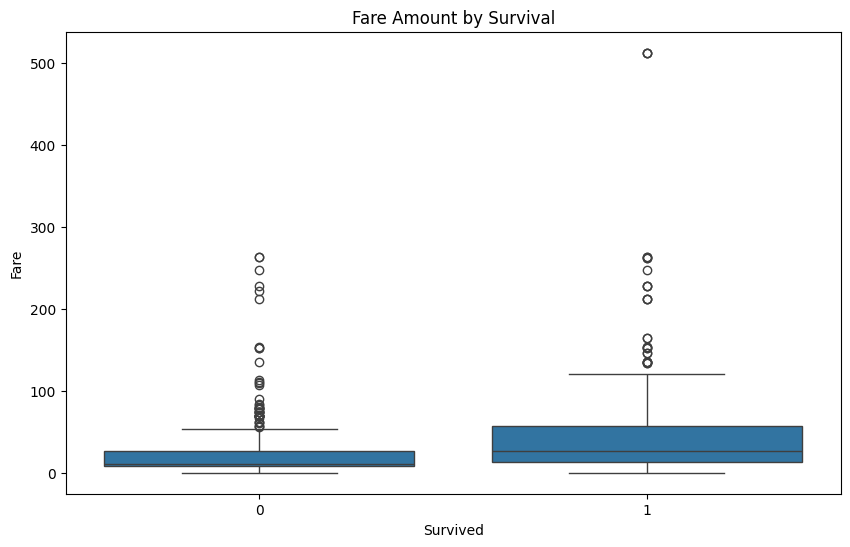

In [31]:
#4.SURVIVAL VS FARE
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Amount by Survival')
plt.show()


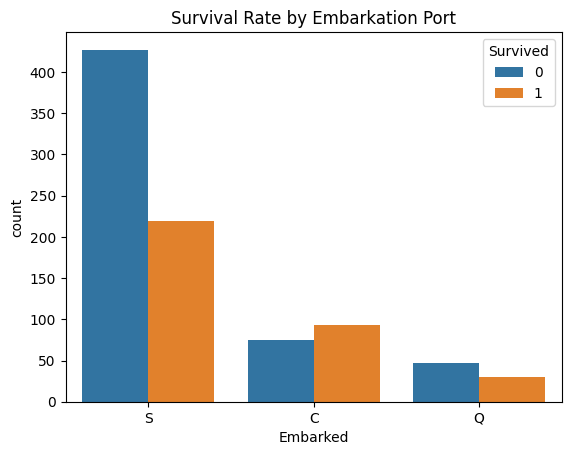

In [32]:
#5.SURVIVAL VS EMBARKED PLOT
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()


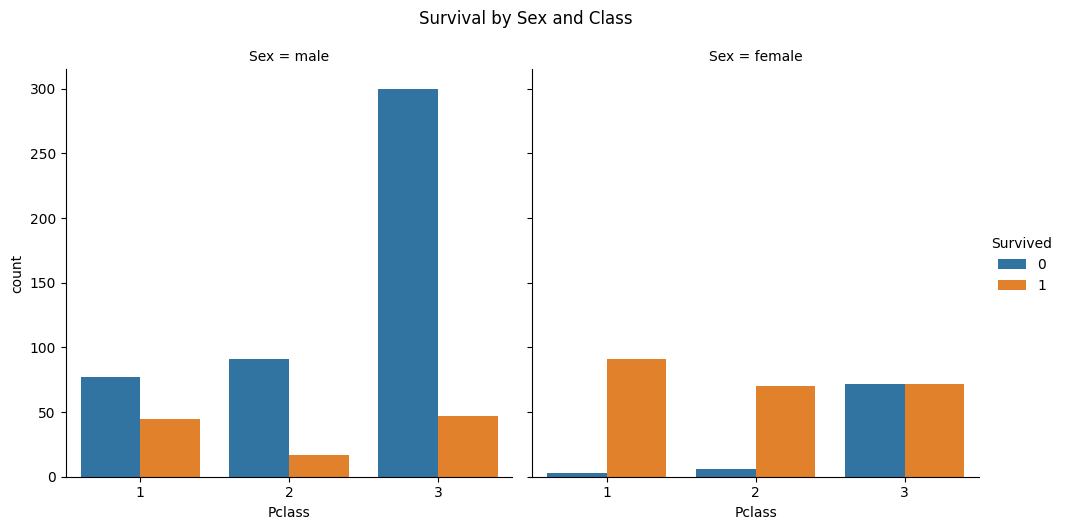

In [33]:
#6.SEX + CLASS COMBINED EFFECT
sns.catplot(x='Pclass', hue='Survived', col='Sex', data=df, kind='count')
plt.suptitle("Survival by Sex and Class", y=1.05)
plt.show()


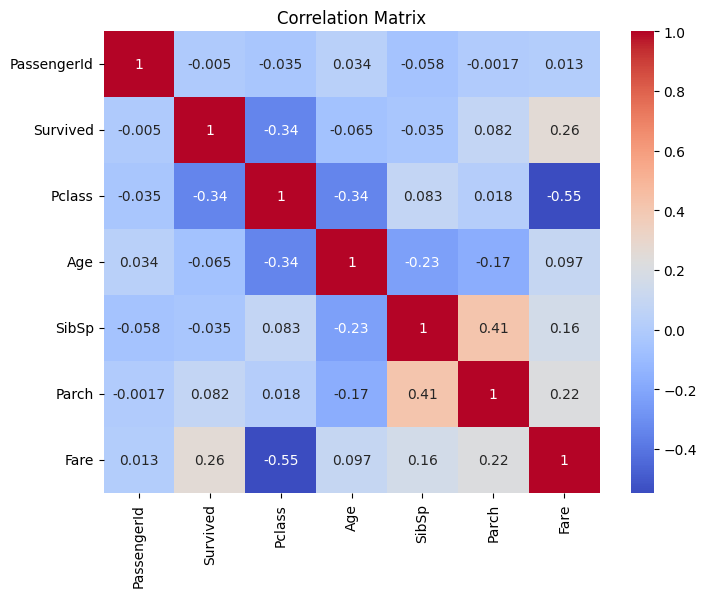

In [35]:
#7.CORRELATION MATRIX
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation calculation
numerical_df_for_corr = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df_for_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()